In [22]:
from IPython.display import Image

# Sudoku


This page describes a Sudoku solving computer program, courtesy of data scientist and astronomer Jake VanDerplas.
(His Python Data Science Handbook is available online at no cost.)

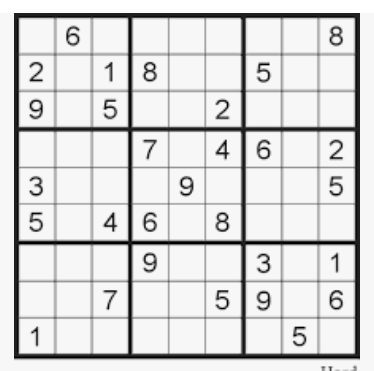

In [23]:
Image('./sudoku2.png', width=300)

The idea is to fill in the blanks with digits to ensure that each row, column, and 3 x 3 box contains all 9 digits.


It will be helpful to have a computer-friendly way to write this Sudoku puzzle: The 9 x 9 format
is a bit impractical here. Let's produce an 81-character puzzle string by reading from top left across 
and then the second row and so on. Blank squares will be designated $0$. Example: The above puzzle becomes


```060000008201800500905002000000704602300090005504608000000900301007005906100000050```

Here is another puzzle:


```
. . 8 6 3 2 4 . .                                       008632400
. 4 . . . . . 1 .                                       040000010
5 . . 9 . 4 . . 6   --------------------------------->  500904006
8 . . . . . . . 5                                       800000005
6 . . . . . . . 4            zeros for blanks           600000004
1 . 7 . . . 9 . 2                                       107000902
4 . . 7 5 1 . . 3   --------------------------------->  400751003
. 6 . . . . . 2 .                                       060000020
. . 5 8 2 6 7 . .                                       005826700
```


The corresponding string version of this Sudoku puzzle:

```
008632400040000010500904006800000005600000004107000902400751003060000020005826700
```


### Solver ideas


The 81 cells can be indexed 0 to 80. Each has a unique (row, column) 
address: row = floor(index/9), column = index%9.


An empty cell can be assigned a **list** of possible values, initially 
1 through 9 but constrained by other values in the column, row, or 3 x 3 box.
For example, cell (0, 0) of the first puzzle could have any of the nine digits 
but some are forbidden:


* 1, 2, 5, 6, 9 from the cell block numbers in the puzzle
* 1, 2, 3, 5, 9 from the column
* 6, 8 from the row


The possible values for index 0 are `['4', '7', '8']`



Every cell has its own set of *related* cells per
the rules. These are the cells in the same *row* as that cell, in the same *column* as 
that cell, and in the same *3 x 3 box* as that cell.


Here is a version of Jake's Sudoku solver. For more comments see the file `sudoku.py` in this folder.



In [24]:
def box_indices(i):
    start = 27 * (i // 27) + 3 * ((i % 9) // 3)
    return [i for j in range(3) for i in range(start + 9 * j, start + 9 * j + 3)]

connected = [(set.union(set(box_indices(i)), set(range(i - i % 9, i - i % 9 + 9)), set(range(i % 9, i % 9 + 81, 9))) - set([i])) for i in range(81)]

def SolveSudoku(p):
    L = []
    for i in range(81):
        if p[i] == '0':
            vals = set(['1', '2', '3', '4', '5', '6', '7', '8', '9']) - set(p[n] for n in connected[i])
            if len(vals) == 0: return  
            else: L.append((len(vals), i, vals)) 
    if len(L) == 0 and '0' not in p: yield p
    else:
        N, i, vals = min(L) 
        for guess in vals:   
            puzzle_with_new_guess = p[:i] + guess + p[i+1:] 
            for s in SolveSudoku(puzzle_with_new_guess):
                yield s 

                
def CheckSolution(a):
    checkset = set('123456789')
    for i in range(9):
        bc = (i%3)*3 + (i//3)*27
        row = set([a[i*9+j] for j in range(9)])
        col = set([a[i + 9*j] for j in range(9)])
        box = set([a[bc], a[bc+1], a[bc+2], a[bc+9], a[bc+10], a[bc+11], a[bc+18], a[bc+19], a[bc+20]])
        if not (row == checkset and col == checkset and box == checkset):
            print('NOT A SOLUTION!!!')
            return
    print('SOLUTION OK')
    return

p = '200805970000600500503719000000000005060908010700000000000487206007003000052106004'      # rated Difficult

allsolns = SolveSudoku(p)
for a in allsolns:
    for i in range(9):
        msg = a[i*9]
        for j in range(1, 9): msg += ' ' + a[i*9 + j]
        print(msg)
    print()
    CheckSolution(a)


2 1 6 8 4 5 9 7 3
9 7 4 6 3 2 5 8 1
5 8 3 7 1 9 6 4 2
1 2 9 3 7 4 8 6 5
4 6 5 9 2 8 3 1 7
7 3 8 5 6 1 4 2 9
3 9 1 4 8 7 2 5 6
6 4 7 2 5 3 1 9 8
8 5 2 1 9 6 7 3 4

SOLUTION OK
